Exit strategy can be one of:
* A fixed holding period
* A target price or profit cap
* The latest entry signal
* A stop price

Exit strategies for different

__Momentum Model__

One of the ways momentum is generated is the _slow diffusion of information_. In this case, the momentum has a finite lifetime. Unfortunately, there is no silver bullet to determine the optimal holding period for a momentum trading strategies. Using average length of momentum might work for the backtest period but may not be profitable applied to the actual market.

__Mean Reversion Model__

The mean reversion of a time series can be modeled by an equation called the _Ornstein-Uhlenbeck Formula_. Let $z(t)$ be the spread of a pair of stocks, $\mu$ the mean value of the prices over time, and $dW$ some random Gaussian noise. The Ornstein-Uhlenbeck Formula is written as

$dz(t)=-\theta(z(t) - \mu)dt+dW$

In [16]:
# Change current path to project root folder
import os
from importlib import reload
os.chdir("..")

In [36]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [27]:
import src.utils as utils
reload(utils)

<module 'src.utils' from '/Users/wtai/Projects/Quantitative_trading/src/utils.py'>

In [2]:
gld_ticker, gdx_ticker = yf.Ticker("GLD"), yf.Ticker("GDX")

In [8]:
gld_df = gld_ticker.history(period="2y")
gdx_df = gdx_ticker.history(period="2y")

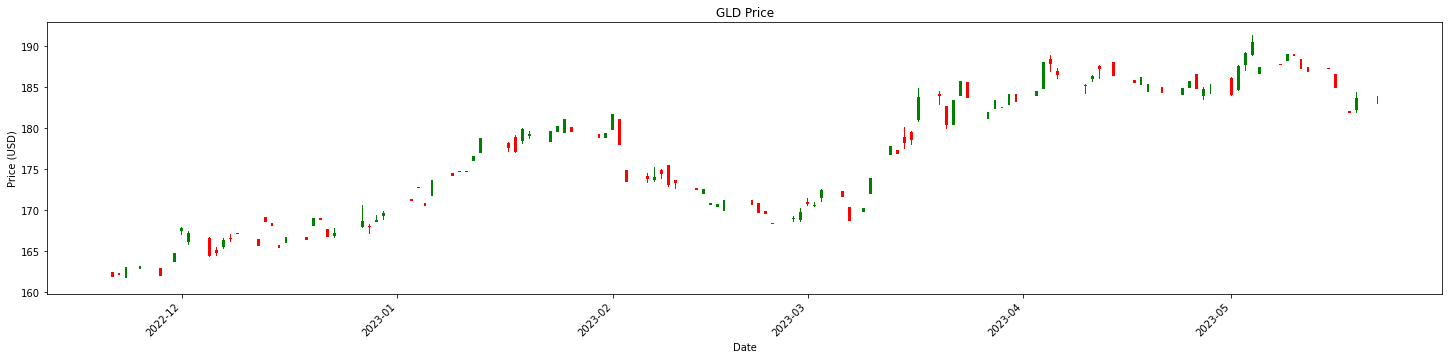

In [30]:
utils.plot_candle_stick(gld_df.iloc[-126:-1, :], figsize=[25, 5], title="GLD Price")

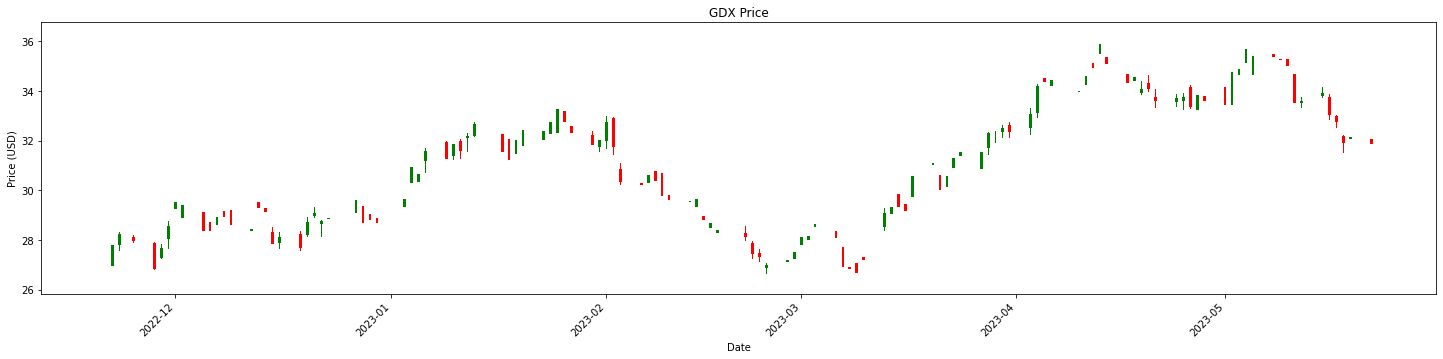

In [31]:
utils.plot_candle_stick(gdx_df.iloc[-126:-1, :], figsize=[25, 5], title="GDX Price")

In [35]:
df = pd.merge(gld_df.Close, gdx_df.Close, left_index=True, right_index=True, suffixes=["_GDX", "_GLD"])

,Close_GDX,Close_GLD
Date,,
2021-05-24 00:00:00-04:00,176.350006,38.107388
2021-05-25 00:00:00-04:00,177.949997,38.194366
2021-05-26 00:00:00-04:00,177.639999,38.136383
2021-05-27 00:00:00-04:00,177.710007,37.894768
2021-05-28 00:00:00-04:00,178.380005,38.097721
...,...,...
2023-05-17 00:00:00-04:00,184.229996,32.730000
2023-05-18 00:00:00-04:00,181.839996,31.879999
2023-05-19 00:00:00-04:00,183.639999,32.160000


Run the Engle-Granger test for the cointegration of two series has unit root. The null hypothesis is that the two time series does not cointegrate. 

The p-value is greater than 0.05. We cannot reject the Null hypothesis.

In [53]:
coint_t, pvalue, crit_value = coint(y0=df.iloc[0:252,:].loc[:,"Close_GLD"], y1=df.iloc[0:252,:].loc[:,"Close_GDX"])
print("T-statistic %.4f" % coint_t)
print("P-value %.4f" % pvalue)
print("Critical value ", crit_value)

T-statistic -2.6113
P-value 0.2323
Critical value  [-3.94060523 -3.36058133 -3.06139039]


Visually the cointegration of two time series does not look stationary. There are a few spikes in 2021-07 and 2021-08. Also, there are a few dips at 2021-11 and 2022-03.

Text(0.5, 1.0, 'Spread of GLD and GDX')

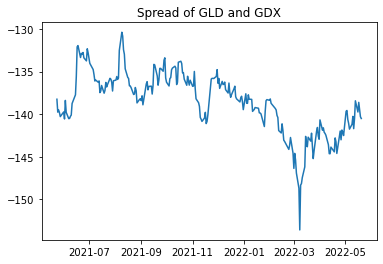

In [57]:
plt.plot(df.iloc[0:252,:].loc[:,"Close_GLD"] - df.iloc[0:252,:].loc[:,"Close_GDX"])
plt.title("Spread of GLD and GDX")